Importing the necessary libraries

In [182]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [183]:
df = pd.read_csv(r'C:\Users\Rohit Varre\Desktop\MliS\ML lab\bank-full.csv')

In [184]:
df.head(-10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45196,25,student,single,secondary,no,358,no,no,cellular,16,nov,330,1,-1,0,unknown,yes
45197,36,management,single,secondary,no,1511,yes,no,cellular,16,nov,270,1,-1,0,unknown,yes
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no


In [185]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [187]:
for i in df.columns:
    if 'unknown' in df[i].unique():
        check = df[i].value_counts().unknown
        print(i,check)

job 288
education 1857
contact 13020
poutcome 36959


<ipython-input-187-2bfd29f18594>:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'unknown' in df[i].unique():


In [188]:
df['duration'] = df['duration']/60
df.drop(['contact','poutcome'],axis = 1,inplace = True)

<AxesSubplot:xlabel='y', ylabel='count'>

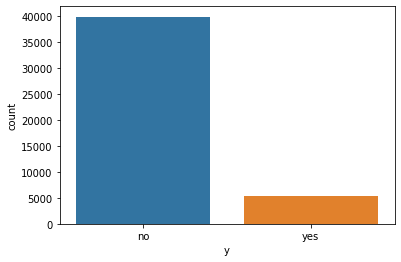

In [189]:
sns.countplot(x="y", data=df)

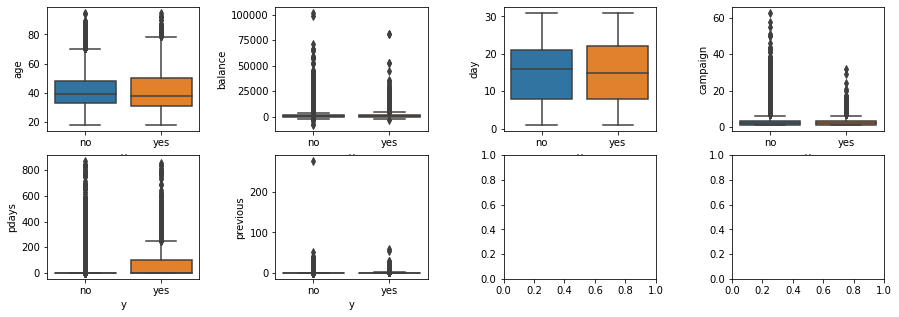

In [190]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,5))
fig.subplots_adjust(hspace =.2, wspace=.5)
axes = axes.ravel()
x_cont = df.columns[df.dtypes == 'int64']
for i, col in enumerate(x_cont):
    sns.boxplot(y=col, x='y', data=df, ax=axes[i])

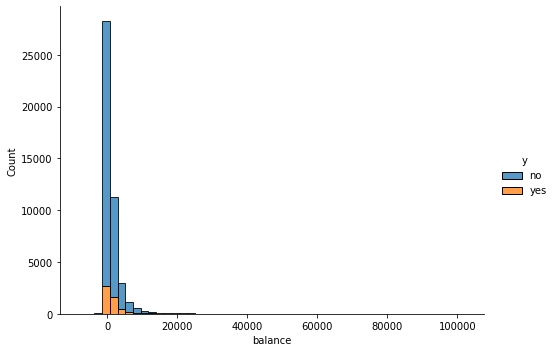

In [191]:
sns.displot(data=df,x="balance",hue="y",kind="hist",aspect=1.4,bins=50,multiple="stack")

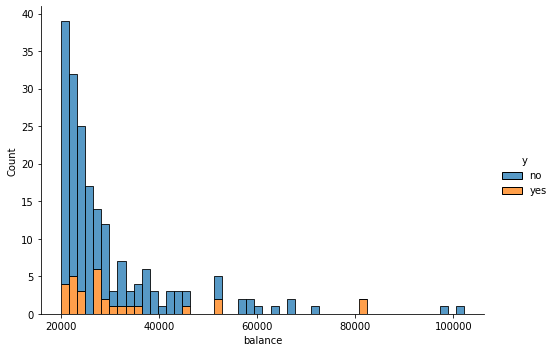

In [192]:
check = df[df['balance']>20000]
sns.displot(data=check,x="balance",hue="y",kind="hist",aspect=1.4,bins=50,multiple="stack")

C:\Users\Rohit Varre\miniconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Rohit Varre\miniconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


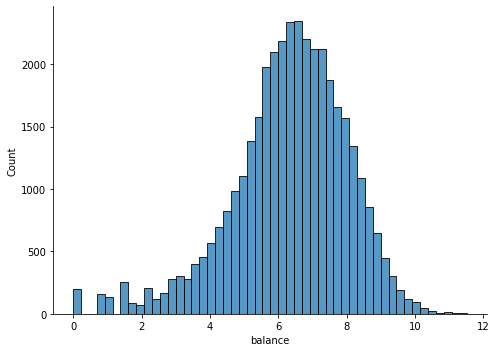

In [193]:
sns.displot(x=np.log(df["balance"]),kind="hist",aspect=1.4,bins=50)

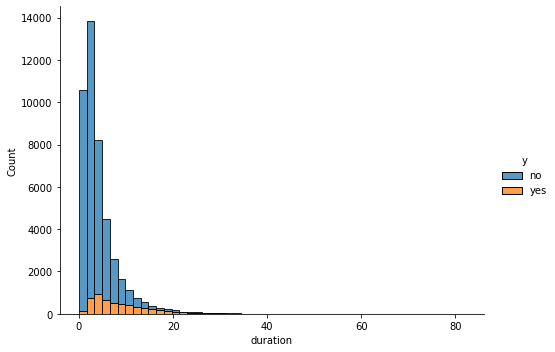

In [194]:
sns.displot(data=df,x="duration",hue="y",kind="hist",aspect=1.4,bins=50,multiple="stack")

In [195]:
df.groupby('y')['duration'].count()

y
no     39922
yes     5289
Name: duration, dtype: int64

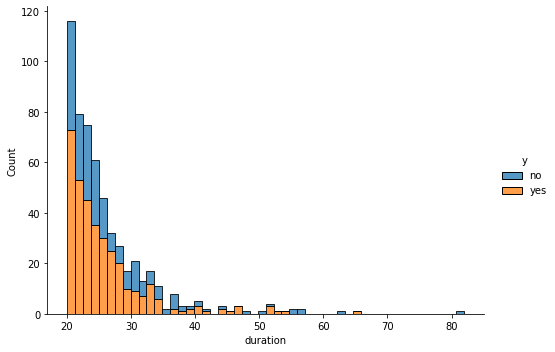

In [196]:
check = df[df['duration']>20]
sns.displot(data=check,x="duration",hue="y",kind="hist",aspect=1.4,bins=50,multiple="stack")

C:\Users\Rohit Varre\miniconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


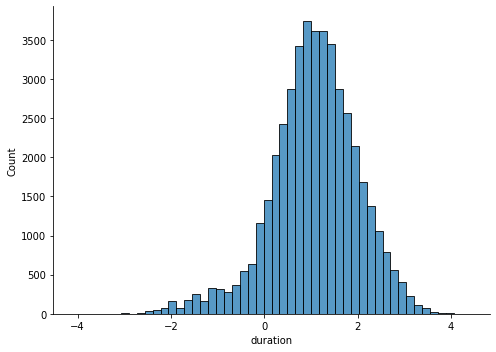

In [197]:
sns.displot(x=np.log(df["duration"]),kind="hist",aspect=1.4,bins=50)

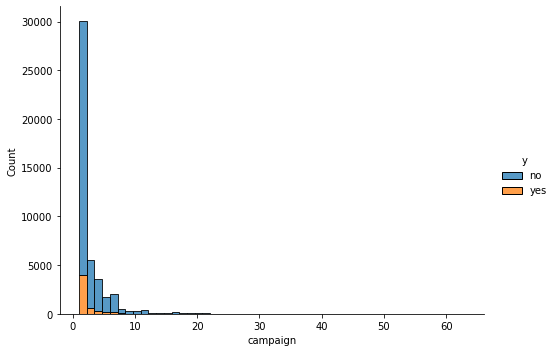

In [198]:
sns.displot(data=df,x="campaign",hue="y",kind="hist",aspect=1.4,bins=50,multiple="stack")

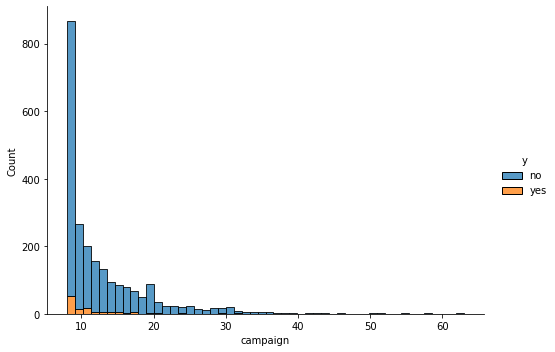

In [199]:
check = df[df['campaign']>7]
sns.displot(data=check,x="campaign",hue="y",kind="hist",aspect=1.4,bins=50,multiple="stack")

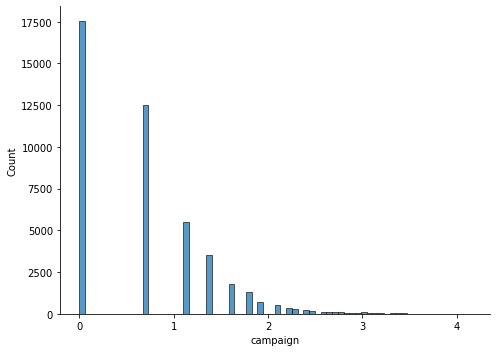

In [200]:
sns.displot(x=np.log(df["campaign"]),kind="hist",aspect=1.4)

In [201]:
x_cont = list(df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')])
x_cat = list(df.columns[df.dtypes == 'object'])
x_cat.remove('y')

In [202]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
print(x_cont)
f_stat, p_val = f_classif(df[x_cont],df['y'])
anova = pd.DataFrame()
anova['Features'] = x_cont
anova['f_stat'] = f_stat
anova['p_val'] = p_val
anova.sort_values(by = 'f_stat',ascending = False,inplace = True)
# kbest = SelectKBest(k=3)
# kbest.fit(df[x_cont],df['y'])
# kbest_features = x_cont[kbest.get_support()]
# print(kbest_features)
anova

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


,Features,f_stat,p_val
3,duration,8333.761148,0.000000e+00
5,pdays,490.696563,3.790553e-108
6,previous,396.443989,7.801830e-88
4,campaign,243.358404,1.012347e-54
1,balance,126.572276,2.521114e-29
2,day,36.359010,1.653880e-09
0,age,28.625233,8.825644e-08


In [203]:
for i in x_cat:
    print(i,df[i].unique())

job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
housing ['yes' 'no']
loan ['no' 'yes']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [204]:
df['job'] = df['job'].replace(['unemployed','unknown','student','housemaid','self-employed','technician','entrepreneur','blue-collar','management'  
  ,'admin.','services','retired'],[0,1,2,3,4,5,6,7,8,9,10,11])
df['marital'] = df['marital'].replace(['single','married','divorced'],[0,1,2])
df['education'] = df['education'].replace(['unknown','primary','secondary','tertiary'],[0,1,2,3])
df['default'] = df['default'].replace(['no','yes'],[0,1])
df['housing'] = df['housing'].replace(['no','yes'],[0,1])
df['loan'] = df['loan'].replace(['no','yes'],[0,1])
df['month'] = df['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],[0,1,2,3,4,5,6,7,8,9,10,11])
df['y'] = df['y'].replace(['no','yes'],[0,1])

In [205]:
from sklearn.feature_selection import chi2
chi2_score, p_value = chi2(df[x_cat],df['y'])
print(chi2_score)
chi2 = pd.DataFrame()
chi2['Features'] = x_cat
chi2['chi2_score'] = chi2_score
chi2['p_value'] = p_value
chi2.sort_values(by = 'chi2_score',ascending = False,inplace = True)
chi2

[5.17028911e-02 4.17633070e+01 3.50694687e+01 2.23138750e+01
 3.88949715e+02 1.76516137e+02 1.78516217e+01]


,Features,chi2_score,p_value
4,housing,388.949715,1.401285e-86
5,loan,176.516137,2.793375e-40
1,marital,41.763307,1.030187e-10
2,education,35.069469,3.181501e-09
3,default,22.313875,2.315277e-06
6,month,17.851622,2.388157e-05
0,job,0.051703,8.201262e-01


In [206]:
print(X.shape,len(df['y']))

(45211, 10) 45211


In [207]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,df['y'])

In [208]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [209]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[9798  245]
 [1011  249]]
0.8888790586569937


C:\Users\Rohit Varre\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [210]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[9662  381]
 [ 822  438]]
0.89356807927099


In [211]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[9710  333]
 [ 996  264]]
0.8824205963018668


In [212]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[9303  740]
 [ 781  479]]
0.8654339555870123


In [213]:
df.drop(['age','day','job','month'],axis = 1, inplace = True)
X = df.drop(['y'],axis = 1)

In [214]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,df['y'])

In [215]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[9742  195]
 [1102  264]]
0.8852517030876759


C:\Users\Rohit Varre\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [216]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[9580  357]
 [ 882  484]]
0.8903830841369548


In [217]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[9640  297]
 [1068  298]]
0.8792356011678315


In [218]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[9300  637]
 [ 888  478]]
0.8650800672387862
